# Project Title:
## Exploratory Data Analysis (EDA) on the Titanic Dataset

#1️⃣ Introduction

##Objective:
The goal of this project is to perform Exploratory Data Analysis (EDA) on the Titanic dataset to understand the underlying patterns, detect anomalies, examine relationships among variables, and uncover insights that explain the survival outcomes of passengers.


**Through this analysis, we’ll answer questions like:**

- What factors influenced passenger survival?

- How did age, gender, and class affect the survival rate?

- What relationships exist among the different features of the dataset?

##Tools Used:

- Python Libraries: Pandas, NumPy, Seaborn, Matplotlib

- Environment: Google Colab

- Techniques: Data Wrangling, Univariate & Bivariate Analysis, Correlation Heatmap Visualization

#2️⃣ Importing Libraries

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


##Interpretation:
These libraries help handle data efficiently (pandas, numpy) and visualize insights (matplotlib, seaborn). Setting the style ensures clear, professional-looking plots.

#3️⃣ Loading the Dataset

In [2]:
# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Interpretation:
The dataset contains information about Titanic passengers such as name, age, class, sex, and whether they survived. Each row represents one passenger.

#4️⃣ Understanding the Data Structure

In [3]:
# Basic info
titanic.info()

# Summary statistics
titanic.describe(include='all')

# Shape of the dataset
titanic.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

##Interpretation:
This gives a general overview — total number of rows and columns, data types, and presence of missing values.
You’ll notice columns like age, sex, class, and survived. The target variable here is survived (1 = survived, 0 = did not survive).

#5️⃣ Checking Missing Values

In [5]:
# Check total missing values in each column
titanic.isnull().sum().sort_values(ascending=False)


,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


/tmp/ipython-input-2206845964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


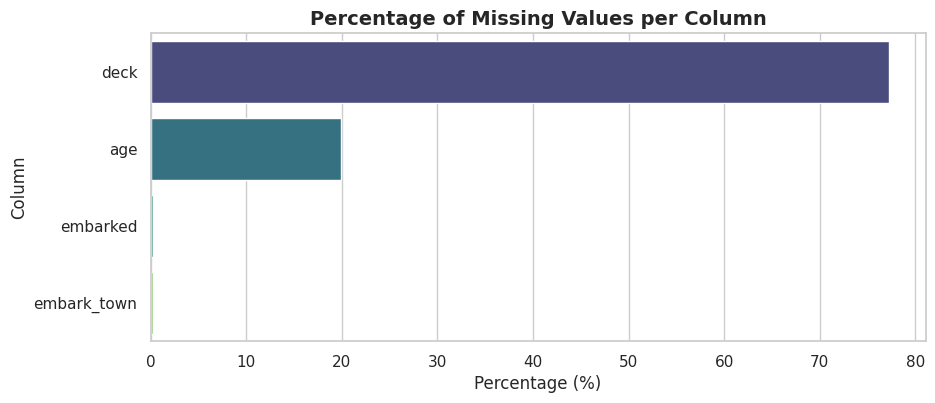

In [7]:
# Percentage of missing values by column
missing_percent = titanic.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]  # Only show columns with missing data

plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')
plt.title("Percentage of Missing Values per Column", fontsize=14, fontweight='bold')
plt.xlabel("Percentage (%)")
plt.ylabel("Column")
plt.show()


#Interpretation:
This displays how many missing entries each column has — for instance, you’ll usually see:

- deck → most missing values

- age → several missing values

- embarked → few missing values

##Visualize Missing Data in Bar Form

This gives a clean horizontal bar chart showing the **percentage of missing data per column** — it’s great for presentations or reports since it quantifies the missingness clearly.

#6️⃣ Univariate Analysis

##a. Age Distribution

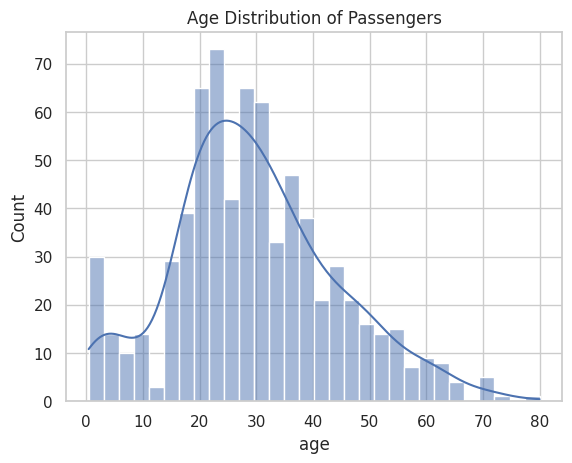

In [8]:
sns.histplot(titanic['age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.show()


##Interpretation:
The histogram shows that most passengers were between **20–40 years old**, suggesting that the majority on board were young adults.

##b. Passenger Class Distribution

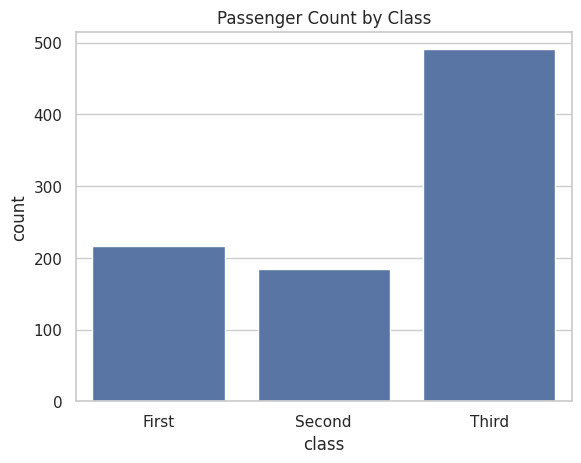

In [9]:
sns.countplot(x='class', data=titanic)
plt.title("Passenger Count by Class")
plt.show()


##Interpretation:
Most passengers were in **3rd class**, indicating that the ship had a higher number of lower-income travelers.

##c. Gender Distribution

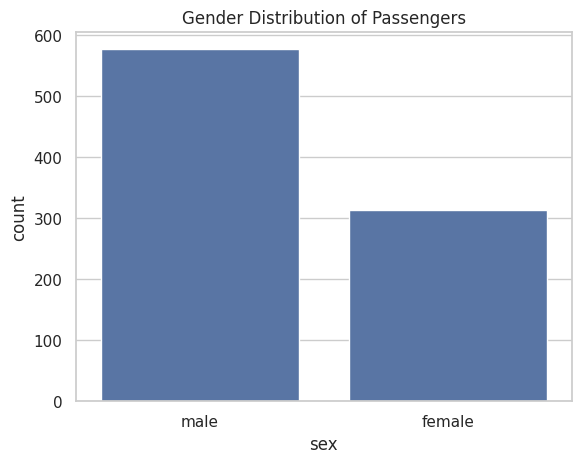

In [10]:
sns.countplot(x='sex', data=titanic)
plt.title("Gender Distribution of Passengers")
plt.show()


##Interpretation:
There were **more males** than females on board, which may influence overall survival statistics.

#7️⃣ Bivariate Analysis

(Relationships between two variables)

##a. Survival by Gender

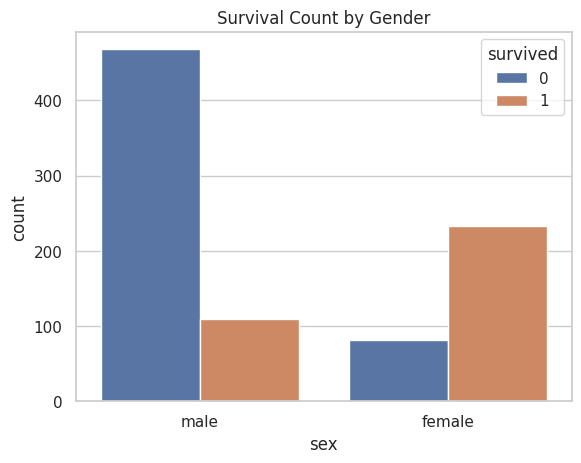

In [11]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Survival Count by Gender")
plt.show()


##Interpretation:
A much higher percentage of **females survived** compared to males — consistent with the “women and children first” policy during evacuation.

##b. Survival Rate by Class

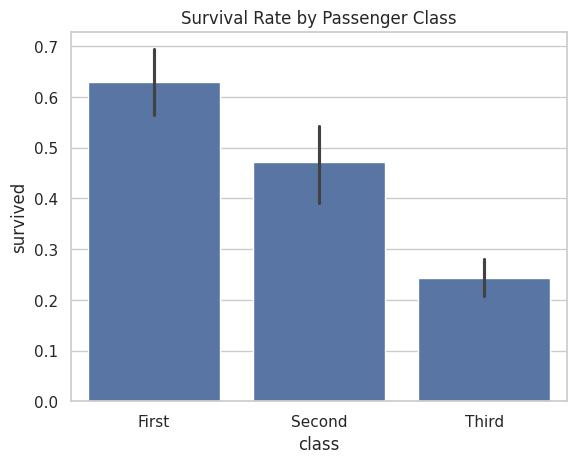

In [12]:
sns.barplot(x='class', y='survived', data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()


##Interpretation:
Passengers in **1st class** had a significantly higher survival rate than those in 2nd or 3rd class — showing that **social and economic status** played a role in survival chances.

##c. Age vs Fare Colored by Survival

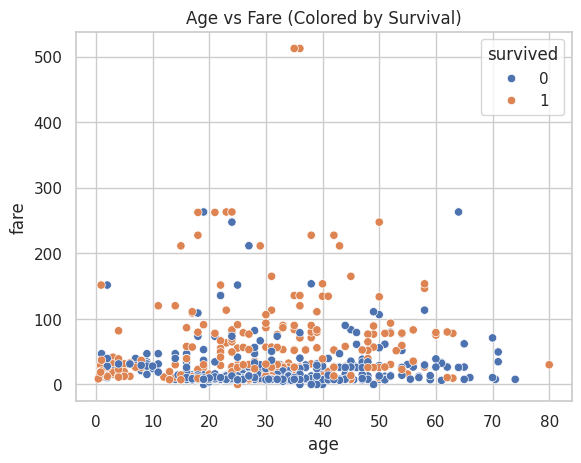

In [13]:
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()


##Interpretation:
Passengers who paid higher fares (mostly older and from 1st class) had **better survival rates**. Younger passengers in lower fare categories were less likely to survive.

#8️⃣ Correlation Analysis

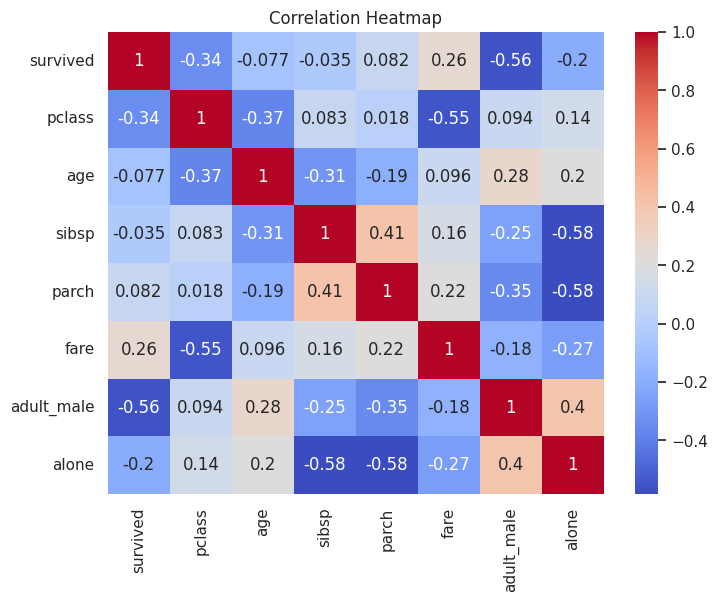

In [14]:
corr = titanic.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#Interpretation:
The heatmap shows numeric correlations:

- **Fare has a positive correlation with Survival, meaning higher fares increased survival likelihood**.

- **Pclass is negatively correlated with Survival, confirming that lower classes faced higher death rates**.

#9️⃣ Data Wrangling

In [15]:
# Fill missing age with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop columns with excessive missing values
titanic.drop(['deck'], axis=1, inplace=True)

# Verify cleanup
titanic.isnull().sum()


/tmp/ipython-input-1984567427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


##Interpretation:
We handle missing data to improve data quality. The median for age maintains data consistency without biasing the mean, and dropping deck avoids distortion since it’s mostly missing.

#🔟 Key Insights & Findings
##🔍 Insights Summary

- **1. Gender: Females had a much higher survival rate than males.**

- **2. Class: Passengers in 1st class had a significantly better chance of survival.**

- **3. Fare: Higher fares correlated positively with survival (wealthier passengers survived more).**

- **4. Age: Younger passengers showed slightly higher survival chances, though the relationship wasn’t strong.**

- **5. Missing Data: Some columns like deck were mostly empty, so they were dropped to maintain accuracy.**

# Conclusion

The EDA reveals clear **social and economic disparities** in survival rates aboard the Titanic. Factors such as **gender, class, and fare** were strong determinants of survival, reflecting the societal norms of the early 1900s.

By performing this analysis, we not only understand the dataset’s structure but also see how real-world inequalities manifested in survival outcomes.

This EDA serves as a foundational step before building predictive models, as it highlights which features most strongly influence survival probability.

# Summary

| Metric               | Result                                  |
| -------------------- | --------------------------------------- |
| **Total Passengers** | 891                                     |
| **Total Survivors**  | 342                                     |
| **Survival Rate**    | ≈ 38.4%                                 |
| **How to Download**  | `files.download("titanic_dataset.csv")` |


# Professional Summary

This Exploratory Data Analysis (EDA) project on the Titanic dataset demonstrates a structured approach to understanding data through visualization and statistics.
Key skills applied include **data wrangling, visualization, and interpretation using Python libraries such as Pandas, Seaborn, and Matplotlib.**

The analysis provided actionable insights into passenger demographics, survival determinants, and feature relationships. These insights can guide feature selection in further machine learning modeling tasks.


Overall, this project reflects strong analytical thinking, attention to detail, and the ability to communicate data-driven insights effectively — essential skills for a data analytics role.